# Logistics Regression

## Linearly seprable or non-linearly seprable datset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
db_df = pd.read_csv("./diabetes.csv")
db_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X = db_df.iloc[:,0:2]
Y = db_df.iloc[:,-1].to_numpy().reshape(-1,1)
X.shape, Y.shape

((768, 2), (768, 1))

In [14]:
neg_dp = db_df[db_df['Outcome'] == 0]
pos_dp = db_df[db_df['Outcome'] == 1]
neg_dp.shape, pos_dp.shape


((500, 9), (268, 9))

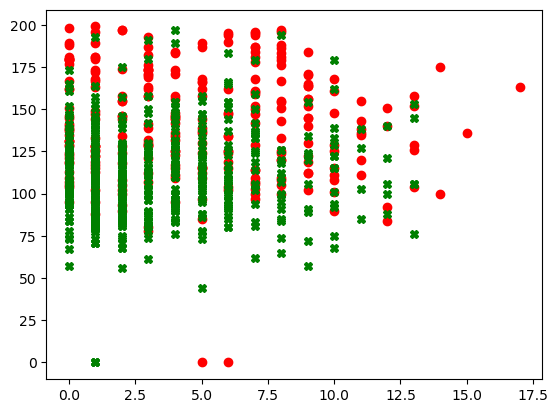

In [17]:
plt.plot(pos_dp["Pregnancies"], pos_dp["Glucose"], "ro", label="Data Points")
plt.plot(neg_dp["Pregnancies"], neg_dp["Glucose"], "gX", label="Data Points")

plt.show()

# this is non linear;y seprable data

## Linear seprable dataset (step function)

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate a linearly separable dataset
X, y = make_classification(n_samples=100,    # Number of samples
                            n_features=2,    # Number of features (2D)
                            n_informative=2, # Both features contribute to the output
                            n_redundant=0,   # No redundant features
                            n_clusters_per_class=1,  # One cluster per class
                            flip_y=0,        # No noise
                            random_state=42)
X.shape, y.shape

((100, 2), (100,))

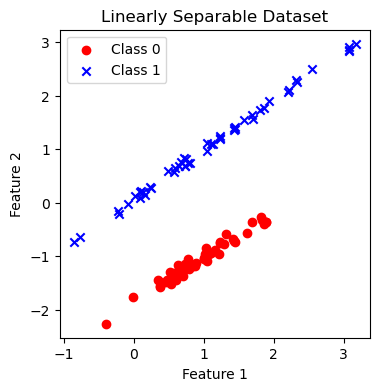

In [134]:
# Plot the dataset
plt.figure(figsize=(4, 4))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', marker='x')
plt.title("Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [135]:
X.shape, y.shape
def step(z):
    return 1 if z > 0 else 0
def perceptron(X,y):
    X = np.insert(X,0,1, axis = 1)
    w = np.ones(X.shape[1])
    lr = 0.1
    for i in range(1000):
        j = np.random.randint(0,100)
        y_pred = step(np.dot(X[j], w))
        w = w + lr * (y[j] - y_pred) * X[j]

    return w

In [136]:
afterW = perceptron(X,y)
# afterW = fit(X,y)

print(afterW[0])
# Create linearly spaced points for cgpa (line_X1) and iq (line_X2)
line_X1 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
line_X2 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
Y = afterW[0] + afterW[1] * line_X1 + afterW[2] * line_X2

0.7000000000000001


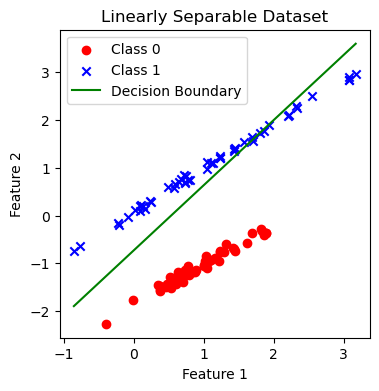

In [137]:
# Plot the dataset
plt.figure(figsize=(4, 4))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', marker='x')

plt.plot(line_X1, Y, "g-", label="Decision Boundary")

plt.title("Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [138]:
import pandas as pd
data = {'cgpa': [7.5, 8.9, 7.0], 'iq': [81,109,81], 'placed': [1,1,0]}
db_df = pd.DataFrame(data)
db_df.head()

,cgpa,iq,placed
0,7.5,81,1
1,8.9,109,1
2,7.0,81,0


In [5]:
neg_class = db_df[db_df["placed"] == 0]
pos_class = db_df[db_df["placed"] == 1]
neg_class.shape, pos_class.shape

((1, 3), (2, 3))

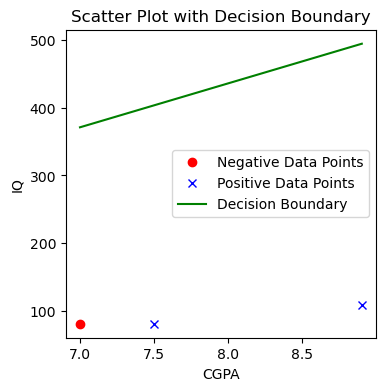

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming db_df, pos_class, and neg_class DataFrames are already defined
# Also assuming w0, w1, w2 have been defined for the linear model.

# Create linearly spaced points for cgpa (line_X1) and iq (line_X2)
line_X1 = np.linspace(db_df["cgpa"].min(), db_df["cgpa"].max(), 100)
line_X2 = np.linspace(db_df["iq"].min(), db_df["iq"].max(), 100)

# Calculate Y using the linear equation
w0 = 5
w1 = 6
w2 = 4
Y = w0 + w1 * line_X1 + w2 * line_X2

# Plot the negative class (red points) and positive class (blue points)
plt.figure(figsize=(4, 4))
plt.plot(neg_class["cgpa"], neg_class["iq"], "ro", label="Negative Data Points")
plt.plot(pos_class["cgpa"], pos_class["iq"], "bx", label="Positive Data Points")

# Draw the decision boundary line (using line_X1 and line_X2)
plt.plot(line_X1, Y, "g-", label="Decision Boundary")

# Add labels, title, and legend
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Scatter Plot with Decision Boundary")
plt.legend()

# Show the plot
plt.show()


In [8]:
db_df
X = db_df.iloc[:,:-1]
y = db_df.iloc[:,-1].to_numpy().reshape(-1,1)
X.shape, y.shape

((3, 2), (3, 1))

In [139]:
X.shape, y.shape
def step(z):
    return 1 if z > 0 else 0
def perceptron(X,y):
    X = np.insert(X,0,1, axis = 1)
    w = np.ones(X.shape[1]).reshape(-1,1)
    print(X.shape, w.shape, X[2])
    lr = 0.1
    for i in range(1000):
        j = np.random.randint(0,X.shape[0])
        y_pred = step(np.dot(X[j], w))
        w = w + lr * (y[j] - y_pred) * X[j]

    return w

after = perceptron(X,y)
print(after)

(100, 3) (3, 1) [1.         2.54881729 2.50225822]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

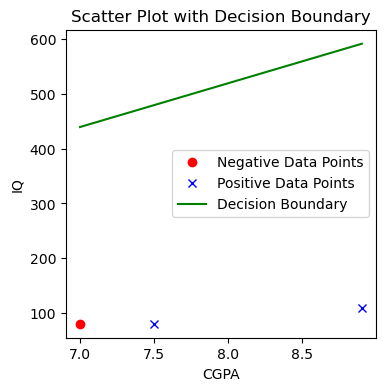

In [140]:
# draw a line
# Assuming db_df, pos_class, and neg_class DataFrames are already defined
# Also assuming w0, w1, w2 have been defined for the linear model.

# Create linearly spaced points for cgpa (line_X1) and iq (line_X2)
line_X1 = np.linspace(db_df["cgpa"].min(), db_df["cgpa"].max(), 100)
line_X2 = np.linspace(db_df["iq"].min(), db_df["iq"].max(), 100)

# Calculate Y using the linear equation
w0 = after[0]
w1 = after[1]
w2 = after[2]
# print(w0, w1, w2)
Y = w0 + w1 * line_X1 + w2 * line_X2

plt.figure(figsize=(4, 4))
plt.plot(neg_class["cgpa"], neg_class["iq"], "ro", label="Negative Data Points")
plt.plot(pos_class["cgpa"], pos_class["iq"], "bx", label="Positive Data Points")

# Draw the decision boundary line (using line_X1 and line_X2)
plt.plot(line_X1, Y, "g-", label="Decision Boundary")

# Add labels, title, and legend
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Scatter Plot with Decision Boundary")
plt.legend()

# Show the plot
plt.show()



## Sigmoid function (replacing the step function)

In [198]:
import pandas as pd
data = {'cgpa': [7.5, 8.9, 7.0], 'iq': [81,109,81], 'placed': [1,1,0]}
db_df = pd.DataFrame(data)
db_df.head()

,cgpa,iq,placed
0,7.5,81,1
1,8.9,109,1
2,7.0,81,0


In [199]:
# # plot the graph
# plt.figure(figsize=(4,4))
# plt.plot(db_df[db_df["placed"] == 0]["cgpa"], db_df[db_df["placed"] == 0]["iq"], "rx", label="Negative Data points")
# plt.plot(db_df[db_df["placed"] == 1]["cgpa"], db_df[db_df["placed"] == 1]["iq"], "b+", label="postive Data points")
# plt.legend()
# plt.show()

In [200]:
X = db_df.iloc[:,:-1].to_numpy()
Y = db_df.iloc[:,-1].to_numpy().reshape(-1,1)
print(X.shape, Y.shape)
X, Y

(3, 2) (3, 1)


(array([[  7.5,  81. ],
        [  8.9, 109. ],
        [  7. ,  81. ]]),
 array([[1],
        [1],
        [0]], dtype=int64))

In [224]:
import math

# sigmoid function replaced the step function
def sigmoidFunction(z):
    return 1/(1 + np.exp(-z))


# def stable_sigmoid(z):
#     return np.where(
#         z >= 0,
#         1 / (1 + np.exp(-z)),  # For positive z, this is stable
#         np.exp(z) / (1 + np.exp(z))  # For negative z, rewrite to avoid overflow
#     )

def predictionFunction(W, X):
    return np.dot(X, W)

def fit(X, Y):
    X = np.hstack((np.ones(X.shape[0]).reshape(-1, 1), X))
    W = np.random.rand(X.shape[1],1)
    # print(X.shape, W.shape)
    epoch = 1000
    lr = 0.1
    for i in range(epoch):
        randomPoint = np.random.randint(0, X.shape[0])
        currentPointX = X[randomPoint]
        currentPointY = Y[randomPoint]
        ypred = predictionFunction(W, currentPointX)
        sigOut = sigmoidFunction(ypred)
        W = W + lr * (currentPointY - sigOut) * currentPointX.reshape(-1,1)
    return W

    

www = fit(X, Y)
www

IndexError: index 54 is out of bounds for axis 0 with size 3

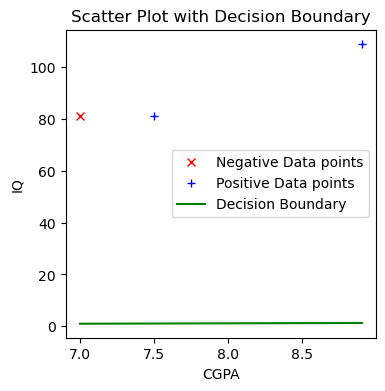

In [225]:
w0 = www[0]
w1 = www[1]
w2 = www[2]

x1 = np.linspace(db_df["cgpa"].min(), db_df["cgpa"].max(), 100)
# x2 = np.linspace(db_df["iq"].min(), db_df["iq"].max(), 100)
x2 = (- w0 - (w1 * x1)) / w2
# y = w0 + w1 * x1 + w2 * x2


# Plot the scatter plot
plt.figure(figsize=(4, 4))
plt.plot(db_df[db_df["placed"] == 0]["cgpa"], db_df[db_df["placed"] == 0]["iq"], "rx", label="Negative Data points")
plt.plot(db_df[db_df["placed"] == 1]["cgpa"], db_df[db_df["placed"] == 1]["iq"], "b+", label="Positive Data points")

# Plot the decision boundary
plt.plot(x1, x2, "g-", label="Decision Boundary")

# Add legend and show the plot
plt.legend()
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Scatter Plot with Decision Boundary")
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate a linearly separable dataset
X, y = make_classification(n_samples=100,    # Number of samples
                            n_features=2,    # Number of features (2D)
                            n_informative=2, # Both features contribute to the output
                            n_redundant=0,   # No redundant features
                            n_clusters_per_class=1,  # One cluster per class
                            flip_y=0,        # No noise
                            random_state=42)
X.shape, y.shape

((100, 2), (100,))

In [3]:
www = fit(X, y)
www

NameError: name 'fit' is not defined

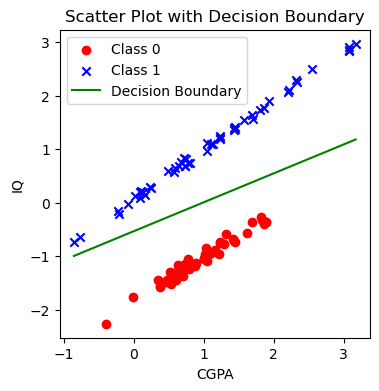

In [228]:
w0 = www[0]
w1 = www[1]
w2 = www[2]

x1 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
# x2 = np.linspace(db_df["iq"].min(), db_df["iq"].max(), 100)
x2 = (- w0 - (w1 * x1)) / w2
# y = w0 + w1 * x1 + w2 * x2


# Plot the scatter plot
plt.figure(figsize=(4, 4))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', marker='x')

# Plot the decision boundary
plt.plot(x1, x2, "g-", label="Decision Boundary")

# Add legend and show the plot
plt.legend()
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Scatter Plot with Decision Boundary")
plt.show()


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict on the test set
y_pred = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
report = classification_report(y, y_pred)
print("Classification Report:")
print(report)


Accuracy: 1.00
Confusion Matrix:
[[50  0]
 [ 0 50]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [9]:
coefficients = model.coef_
intercept = model.intercept_
coefficients, intercept, coefficients[0]

(array([[-1.88691273,  3.13441537]]),
 array([2.0546057]),
 array([-1.88691273,  3.13441537]))

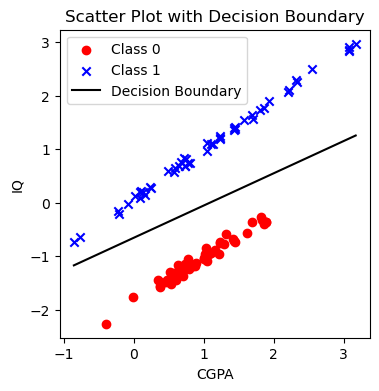

In [11]:
w0 = intercept[0]
w1 = coefficients[0][0]
w2 = coefficients[0][1]

x1 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
# x2 = np.linspace(db_df["iq"].min(), db_df["iq"].max(), 100)
x2 = (- w0 - (w1 * x1)) / w2
# y = w0 + w1 * x1 + w2 * x2


# Plot the scatter plot
plt.figure(figsize=(4, 4))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', marker='x')

# Plot the decision boundary
plt.plot(x1, x2, "k-", label="Decision Boundary")

# Add legend and show the plot
plt.legend()
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Scatter Plot with Decision Boundary")
plt.show()


# Logistics Regression (Linear) using the Loss function

## Using Sklearn library

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100,    # Number of samples
                            n_features=2,    # Number of features (2D)
                            n_informative=2, # Both features contribute to the output
                            n_redundant=0,   # No redundant features
                            n_clusters_per_class=1,  # One cluster per class
                            flip_y=0,        # No noise
                            random_state=42)

In [65]:
print("Shape :: ", X.shape, y.shape)
(y == 0)[0]

Shape ::  (100, 2) (100,)


True

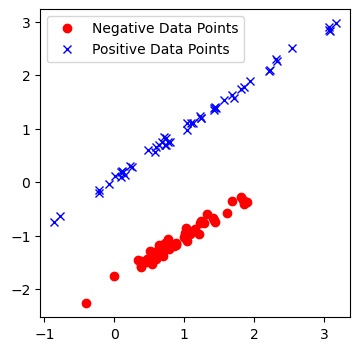

In [66]:
# Visulaize the data
plt.figure(figsize=(4, 4))
plt.plot(X[y == 0, 0], X[y == 0, 1], "ro", label="Negative Data Points")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bx", label="Positive Data Points")
plt.legend()
plt.show()

In [67]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
ypred = logreg.predict(X)

In [68]:
# import metrics
from sklearn.metrics import r2_score, confusion_matrix

print("R2Score :: ", r2_score(y, ypred))
print("Confusiion Matrix :: ")
print(confusion_matrix(y, ypred))

R2Score ::  1.0
Confusiion Matrix :: 
[[50  0]
 [ 0 50]]


In [69]:
# Get the coefficients and intecerpts
coef = logreg.coef_
inte = logreg.intercept_
print(coef, intercept)

w0 = intercept[0]
w1 = coef[0][0]
w2 = coef[0][1]

[[-1.88691273  3.13441537]] [2.0546057]


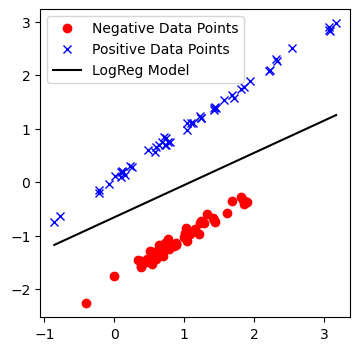

In [70]:
# Visulaize the data
plt.figure(figsize=(4, 4))

x1 = np.linspace(X[:,0].min(), X[:,0].max(), 200)
# 0 = w0 + w1x1 + w2x2
x2 = (-w0 - w1 * x1) / w2


plt.plot(X[y == 0, 0], X[y == 0, 1], "ro", label="Negative Data Points")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bx", label="Positive Data Points")

plt.plot(x1, x2, "k-", label="LogReg Model")

plt.legend()
plt.show()

## Gradient Descent 

$L = -\frac{1}{n} \left( Y \cdot \log(\hat{Y}) + (1 - Y) \cdot \log(1 - \hat{Y}) \right)$

$\nabla L = -\frac{1}{n} (Y - \hat{Y}) X$

$\hat{Y} = \text{sigmoid}(XW) = \frac{1}{1 + e^{-XW}}$

$X \in \mathbb{R}^{n \times (m+1)}, \quad W \in \mathbb{R}^{(m+1) \times 1}$

In [81]:
y = y.reshape(-1,1)
X.shape, y.shape
# (y == 0)[:,0]

((100, 2), (100, 1))

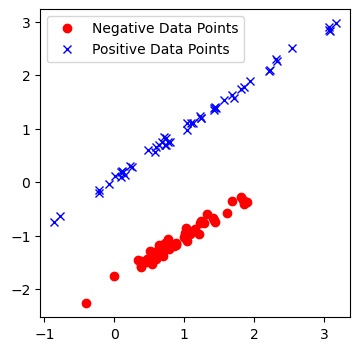

In [80]:
# Visulaize the data
plt.figure(figsize=(4, 4))
plt.plot(X[(y == 0)[:,0], 0], X[(y == 0)[:,0], 1], "ro", label="Negative Data Points")
plt.plot(X[(y == 1)[:,0], 0], X[(y == 1)[:,0], 1], "bx", label="Positive Data Points")
plt.legend()
plt.show()

In [163]:
import numpy as np

class LogisRegre:
    def __init__(self, lr=0.1, epoch=1000):
        self.W = None
        self.lr = lr
        self.epoch = epoch

    def prediction(self, X):
        # Sigmoid function
        return 1 / (1 + np.exp(-np.matmul(X, self.W)))

    def fit(self, X, y):
        # Adding bias term
        n = X.shape[0]
        XOnes = np.hstack((np.ones((X.shape[0], 1)), X))  # Adding bias column
        self.W = np.random.rand(XOnes.shape[1], 1)  # Initializing weights randomly

        # Training process
        for _ in range(self.epoch):
            ypred = self.prediction(XOnes)  # Predicting using the sigmoid function
            delL = (-1 / n) * np.matmul(XOnes.T, (y - ypred))  # Gradient calculation
            self.W = self.W - self.lr * delL  # Updating weights

        return self.W

m = LogisRegre(lr=0.09, epoch=1000)
fitW = m.fit(X, y)
print(fitW)

[[ 1.98765542]
 [-2.03825069]
 [ 3.9127326 ]]


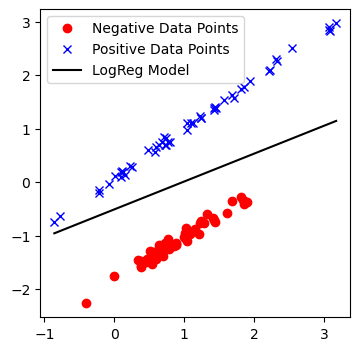

In [164]:
# Visulaize the data
w0 = fitW[0][0]
w1 = fitW[1][0]
w2 = fitW[2][0]

plt.figure(figsize=(4, 4))

x1 = np.linspace(X[:,0].min(), X[:,0].max(), 200)
# 0 = w0 + w1x1 + w2x2
x2 = (-w0 - w1 * x1) / w2

plt.plot(X[(y == 0)[:,0], 0], X[(y == 0)[:,0], 1], "ro", label="Negative Data Points")
plt.plot(X[(y == 1)[:,0], 0], X[(y == 1)[:,0], 1], "bx", label="Positive Data Points")
plt.plot(x1, x2, "k-", label="LogReg Model")

plt.legend()
plt.show()

In [171]:
XOnes = np.hstack((np.ones((X.shape[0], 1)), X))
ypred = m.prediction(XOnes)
(ypred >= 0.5).sum()
(ypred < 0.5).sum()


50

In [182]:
# (y == 0)[:,0].sum()

ypred[0] == 0

array([False])

In [185]:
# confusion matrix
tp = 0
fn = 0
fp = 0
tn = 0
for i in range(y.shape[0]):
    if (y[i] == 1)[0] and (ypred[i] >= 0.5)[0]:
        tp = tp + 1
    elif (y[i] == 1)[0] and (ypred[i] < 0.5)[0]:
        fn = fn + 1
    elif (y[i] == 0)[0] and (ypred[i] >= 0.5)[0]:
        fp = fp + 1
    elif (y[i] == 0)[0] and (ypred < 0.5)[0]:
        tn = tn + 1
      
cofMat = np.array([[tp, fn], [fp, tn]])
print(cofMat)

[[50  0]
 [ 0 50]]


# Softmax Function (Multiclass Classification) IRIS Data set sklearn library

In [186]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=3, random_state=42, flip_y=0, n_clusters_per_class=1)

In [189]:
y.shape, X.shape

((200,), (200, 2))

In [190]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [191]:
df = sns.load_dataset('iris')

In [192]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [194]:
df = df[["sepal_length", "petal_length", "species"]]
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


In [199]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]
X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=2)

In [203]:
clf = LogisticRegression(multi_class="multinomial")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [204]:
print(accuracy_score(y_test, y_pred))

0.9555555555555556


In [205]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,17,0,0
1,0,14,1
2,0,1,12


In [206]:
q = np.array([[3.4,2.7]])
clf.predict_proba(q)

c:\Users\sande\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.84407094e-01, 2.14825590e-01, 7.67315757e-04]])

In [207]:
clf.predict(q)

c:\Users\sande\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

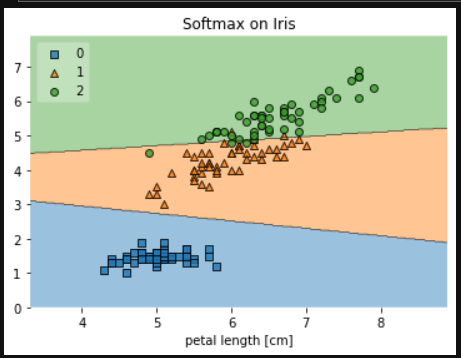

In [212]:
# # !pip install mlxtend
# from mlxtend.plotting import plot_decision_regions

# plot_decision_regions(X.values, y.values, clf, legend=2)

# plt.xlabel("Sepal Length")
# plt.ylabel("Sepal Length")
# plt.title("Softmax on iris")
# plt.show()

# Polynomial Logistics Regression

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [214]:
df = pd.read_csv('ushape.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ushape.csv'